## Install libraries

In [62]:
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install matplotlib
# !pip3 install seaborn
# !pip3 install category_encoders
# !pip3 install sklearn
# !pip3 install scipy

## Import libraries

In [63]:
# Using python 3.6
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import category_encoders as ce
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option("display.max_rows", None, "display.max_columns", None)

## Load csv files into dataframes

In [64]:
train_df_main = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

train_df_main.head().style.background_gradient(cmap='Blues')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000


In [65]:
test_df_main = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

test_df_main.head().style.background_gradient(cmap='Greens')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000000,11622,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,468.000000,LwQ,144.000000,270.000000,882.000000,GasA,TA,Y,SBrkr,896,0,0,896,0.000000,0.000000,1,0,2,1,TA,5,Typ,0,nan,Attchd,1961.000000,Unf,1.000000,730.000000,TA,TA,Y,140,0,0,0,120,0,nan,MnPrv,nan,0,6,2010,WD,Normal
1,1462,20,RL,81.000000,14267,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000000,TA,TA,CBlock,TA,TA,No,ALQ,923.000000,Unf,0.000000,406.000000,1329.000000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000000,0.000000,1,1,3,1,Gd,6,Typ,0,nan,Attchd,1958.000000,Unf,1.000000,312.000000,TA,TA,Y,393,36,0,0,0,0,nan,nan,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000000,13830,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,GLQ,791.000000,Unf,0.000000,137.000000,928.000000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000000,0.000000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000000,Fin,2.000000,482.000000,TA,TA,Y,212,34,0,0,0,0,nan,MnPrv,nan,0,3,2010,WD,Normal
3,1464,60,RL,78.000000,9978,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000000,TA,TA,PConc,TA,TA,No,GLQ,602.000000,Unf,0.000000,324.000000,926.000000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000000,0.000000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000000,Fin,2.000000,470.000000,TA,TA,Y,360,36,0,0,0,0,nan,nan,nan,0,6,2010,WD,Normal
4,1465,120,RL,43.000000,5005,Pave,nan,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000000,Unf,0.000000,1017.000000,1280.000000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000000,0.000000,2,0,2,1,Gd,5,Typ,0,nan,Attchd,1992.000000,RFn,2.000000,506.000000,TA,TA,Y,0,82,0,0,144,0,nan,nan,nan,0,1,2010,WD,Normal


## Split training set into train and validation sets, Check column types

In [66]:
train_df_copy = train_df_main.copy()
train_df, cv_df = train_test_split(train_df_copy, test_size=0.2, random_state=25)
test_df = test_df_main.copy()
pd.DataFrame(train_df.dtypes).T

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,int64,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64


## Check train data missing value count for each column

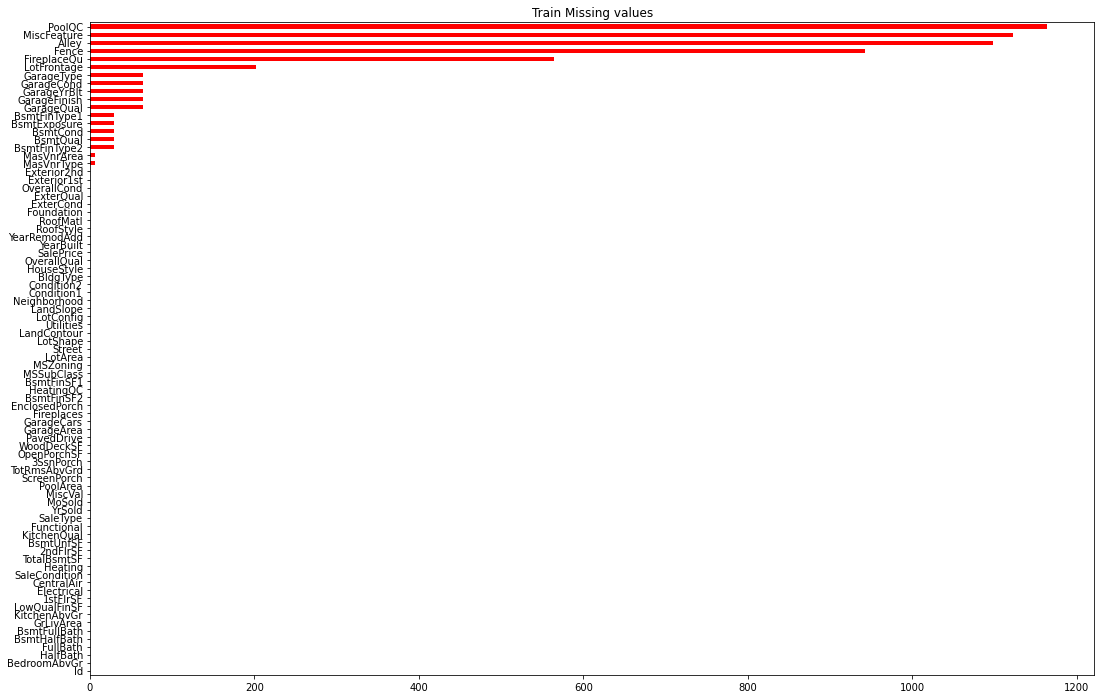

In [67]:
plt.figure(figsize=(18, 12))
train_df.isna().sum().sort_values().plot.barh(color='red')
plt.title('Train Missing values')
plt.show()

### Most of these NaN values are caused by the format of data, where NaN variables may indicate absence of given parameter (e.g not having alley would be represented by NaN). Ordinal encoding (wherever necessary) will get rid of this problem and also do the job of preprocessing.

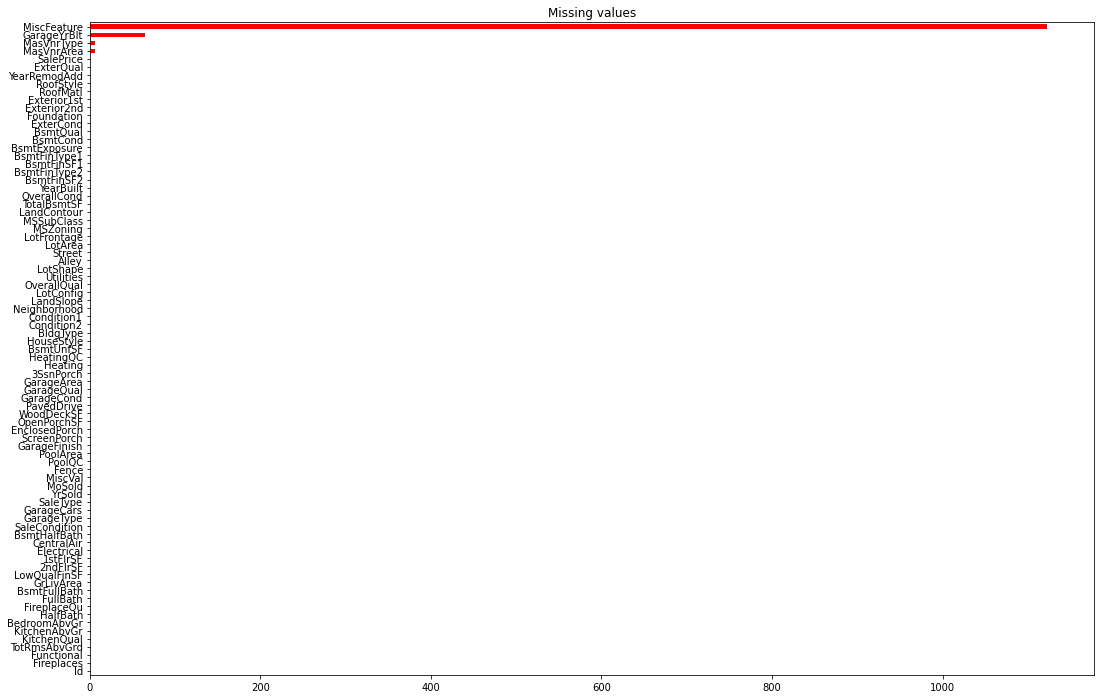

In [68]:
# Mapping ordinal columns, filling NaN variables while doing so
# Using data descriptions to map all the values

# MSZoning
zoning_mapper = {'I': 1, 'FV': 2, 'A': 3, 'RH': 4, 'RM': 5, 'RL': 6, 'RP': 7, 'C (all)': 8}
train_df['MSZoning'] = train_df.MSZoning.replace(zoning_mapper)

# Street
street_mapper = {np.nan: 0, 'Grvl': 1, 'Pave': 2}
train_df['Street'] = train_df.Street.replace(street_mapper)

# Alley
train_df['Alley'] = train_df.Alley.replace(street_mapper)

# Utilities
utilities_mapper = {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4}
train_df['Utilities'] = train_df.Utilities.replace(utilities_mapper)

# Slope
slope_mapper = {'Sev': 1, 'Mod': 2, 'Gtl': 3}
train_df['LandSlope'] = train_df.LandSlope.replace(slope_mapper)

quality_mapper = {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

# ExterQual
train_df['ExterQual'] = train_df.ExterQual.replace(quality_mapper)

# ExterCond
train_df['ExterCond'] = train_df.ExterCond.replace(quality_mapper)

# BsmtQual
train_df['BsmtQual'] = train_df.BsmtQual.replace(quality_mapper)

# BsmtCond
train_df['BsmtCond'] = train_df.BsmtCond.replace(quality_mapper)

# FireplaceQu
train_df['FireplaceQu'] = train_df.FireplaceQu.replace(quality_mapper)

# PoolQC
train_df['PoolQC'] = train_df.PoolQC.replace(quality_mapper)

# KitchenQual
train_df['KitchenQual'] = train_df.KitchenQual.replace(quality_mapper)

# HeatingQC
train_df['HeatingQC'] = train_df.HeatingQC.replace(quality_mapper)

# GarageQual
train_df['GarageQual'] = train_df.GarageQual.replace(quality_mapper)

# GarageCond
train_df['GarageCond'] = train_df.GarageCond.replace(quality_mapper)

# BsmtExposure
bsmtexp_mapper = {np.nan: 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
train_df['BsmtExposure'] = train_df.BsmtExposure.replace(bsmtexp_mapper)

# BsmtFinType
bsmtfin_mapper = {np.nan: 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
train_df['BsmtFinType1'] = train_df.BsmtFinType1.replace(bsmtfin_mapper)
train_df['BsmtFinType2'] = train_df.BsmtFinType2.replace(bsmtfin_mapper)

# CentralAir
central_air_mapper = {'N': 0, 'Y': 1}
train_df['CentralAir'] = train_df.CentralAir.replace(central_air_mapper)

# Electrical
electrical_mapper = {'FuseP': 0, 'FuseF': 1, 'Mix': 1, 'FuseA': 2, 'SBrkr': 3}
train_df['Electrical'] = train_df.Electrical.replace(electrical_mapper)

# Functional
functionality_mapper = {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}
train_df['Functional'] = train_df.Functional.replace(functionality_mapper)

# GarageFinish
garage_finish_mapper = {np.nan: 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
train_df['GarageFinish'] = train_df.GarageFinish.replace(garage_finish_mapper)

# Fence
fence_mapper = {np.nan: 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
train_df['Fence'] = train_df.Fence.replace(fence_mapper)

# PavedDrive
paved_drive_mapper = {'N': 1, 'P': 2, 'Y': 3}
train_df['PavedDrive'] = train_df.PavedDrive.replace(paved_drive_mapper)

# Fill other NaN values
# LotFrontage
# Fill lot frontage with zeroes because in this NaN means no lot frontage
train_df['LotFrontage'] = train_df.LotFrontage.fillna(0)

# GarageTYpe
train_df['GarageType'] = train_df.GarageType.fillna('None')

ordinal_cols = ['MSZoning', 'Street', 'Alley', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 
                'BsmtCond', 'FireplaceQu', 'PoolQC', 'KitchenQual', 'GarageQual', 'GarageCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'Electrical', 'Functional', 'GarageFinish', 
                'Fence', 'PavedDrive']

plt.figure(figsize=(18, 12))
train_df.isna().sum().sort_values().plot.barh(color='red')
plt.title('Missing values')
plt.show()

### Resolve remaining NaN value problem

### Drop columns where more than 70% of values are missing

In [69]:
missing_value_limit = 0.7
non_na_columns = train_df.isnull().sum() < train_df.shape[0] * missing_value_limit
train_df = train_df.loc[:, non_na_columns]

### Fill missing values with forward-backward filling method

In [70]:
def get_na_columns(df):
    na_cols = df.isna().sum().sort_values(ascending=False)
    na_cols = na_cols[na_cols > 0]
    return na_cols if len(na_cols) else None

def fill_na_cols(df):
    na = get_na_columns(df)
    if na is not None:
        na_cols = na.index.values.tolist()
        for col in na_cols:
            if df[col].dtype == 'object':
                df.loc[:, col] = df.loc[:, col].fillna(method='ffill')
                df.loc[:, col] = df.loc[:, col].fillna(method='bfill')
            elif col in ordinal_cols or col == 'MSSubClass':
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:
                df[col].fillna(df[col].median(), inplace=True)
    else:
        print('No NaN values')

fill_na_cols(train_df)
print('Remaining null values:', train_df.isna().sum().sum())


Remaining null values: 0


## Check correlation between variable pairs

In [71]:

train_df_corr = train_df.corr()
correlation_limit = 0.65
rows, cols = np.where(abs(train_df_corr) > correlation_limit) # Where absolute value of correlation coefficient is more than the limit
correlated_pairs = [*zip(train_df_corr.index[rows], train_df_corr.columns[cols])]
filtered_pairs = []
correlations = []
for pair in correlated_pairs:
    if pair[0] != pair[1] and pair[::-1] not in filtered_pairs:
        filtered_pairs.append(pair)
        correlations.append(train_df_corr.loc[pair[0], pair[1]])
[*zip(filtered_pairs, correlations)]

[(('OverallQual', 'ExterQual'), 0.7352482447154355),
 (('OverallQual', 'KitchenQual'), 0.678661262816604),
 (('OverallQual', 'SalePrice'), 0.7891683242689137),
 (('YearBuilt', 'GarageYrBlt'), 0.7805959522529835),
 (('ExterQual', 'KitchenQual'), 0.7133687202142437),
 (('ExterQual', 'SalePrice'), 0.6888276312141013),
 (('BsmtFinType1', 'BsmtFinSF1'), 0.6809399417695007),
 (('BsmtFinType2', 'BsmtFinSF2'), 0.8012044724595363),
 (('TotalBsmtSF', '1stFlrSF'), 0.822746329049041),
 (('2ndFlrSF', 'GrLivArea'), 0.6847507038044428),
 (('GrLivArea', 'TotRmsAbvGrd'), 0.8284126591212987),
 (('GrLivArea', 'SalePrice'), 0.6976213965075566),
 (('BedroomAbvGr', 'TotRmsAbvGrd'), 0.6706093017332388),
 (('KitchenQual', 'SalePrice'), 0.6663136149351594),
 (('Fireplaces', 'FireplaceQu'), 0.8727869975505083),
 (('GarageCars', 'GarageArea'), 0.8816869631405596),
 (('GarageQual', 'GarageCond'), 0.9584939459066342),
 (('PoolArea', 'PoolQC'), 0.9590828035701877)]

## Plot column-SalePrice dependency for most higly correlated features

Text(0.5, 1.0, 'Kitchen Quality')

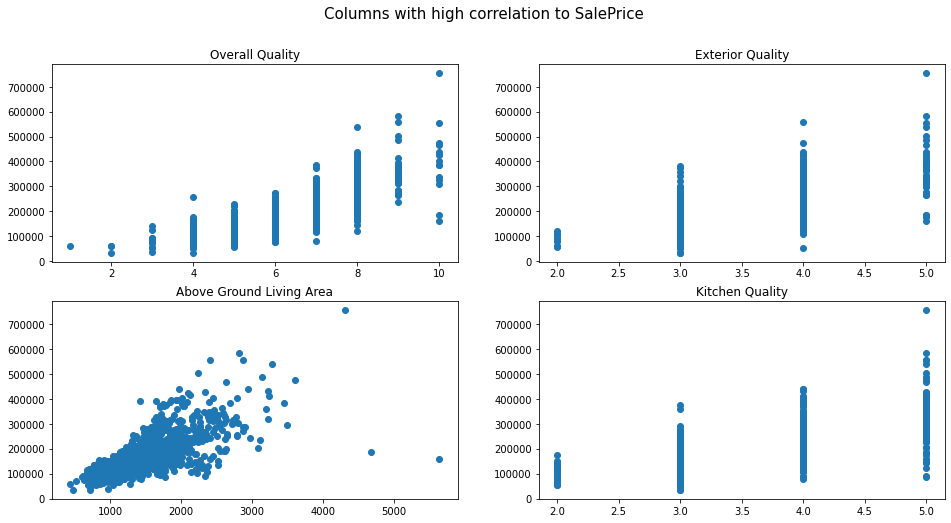

In [72]:
plt.figure(1, figsize=(16, 8))

plt.suptitle('Columns with high correlation to SalePrice', fontsize=15)
plt.subplot(221)
plt.scatter(x=train_df.OverallQual, y=train_df.SalePrice)
plt.title('Overall Quality')

plt.subplot(222)
plt.scatter(x=train_df.ExterQual, y=train_df.SalePrice)
plt.title('Exterior Quality')

plt.subplot(223)
plt.scatter(x=train_df.GrLivArea, y=train_df.SalePrice)
plt.title('Above Ground Living Area')

plt.subplot(224)
plt.scatter(x=train_df.KitchenQual, y=train_df.SalePrice)
plt.title('Kitchen Quality')

### These look mostly linear, Overall Quality seems quadratic, let's try using it as non-linear parameter when we get to that point

## Review highly correlated pairs

In [73]:
# Next step is to remove one column from each pair wherever it seems reasonable

# 1. OverallQual already takes ExterQual into account and theres high correlation but since both are highly
# correlated to target (SalePrice) it's better to leave both

# 2. Same reason as previous case

# 3. Correlation to target variable might be good

# 4. Remove GarageYrBlt as it's the same as YearBuilt in most cases
train_df = train_df.drop(columns=['GarageYrBlt'])

# 5. Already addressed both in 1 and 2, these stay

# 6. Correlation to target

# 7 - 8. Although BsmtFinType is correlated to BsmtFinSF, there isn't direct connection between them logically
# These will stay in current model

# 9. First floor is above basement in most cases so TotalBsmtSF can be dropped
train_df = train_df.drop(columns=['TotalBsmtSF'])

# 10. Most houses are 2 storey tall so this correlation is clear, but GrLivArea already covers 2nd floor
# for 2 storey buildings and offers more information for taller ones
train_df = train_df.drop(columns=['2ndFlrSF'])

# 11. TotRmsAbvGrd is proportional to GrLivArea in most cases, I think GrLivArea is more useful
train_df = train_df.drop(columns=['TotRmsAbvGrd'])

# 12. Correlation to target

# 13. TotRmsAbvGrd already dropped

# 14. Correlation to target

# 15. Most houses don't have more than 1 fireplace (train_df.Fireplaces.value_counts()) so the number variable will have to go
train_df = train_df.drop(columns=['Fireplaces'])

# 16. GarageArea might be more useful, because it doesn't only serve as parking space
train_df = train_df.drop(columns=['GarageCars'])

# 17. GarageQual and GarageCond happen to be correlated but one doesn't necessarily guarantee the other
# but since they are so tightly connected it might be better to remove one from the model
train_df = train_df.drop(columns=['GarageCond'])

# 18. Same reasoning as above
train_df = train_df.drop(columns=['PoolQC'])
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'M

### Now let's check features that are represented by two columns
#### Condition1-Condition2, Exterior1st-Exterior2nd, BsmtFinType1-BsmtFinType2, BsmtFinSF1-BsmtFinSF2
### if they have significant intersection it's better to drop one from a pair

In [74]:
two_column_features = [('Condition1', 'Condition2'), ('Exterior1st', 'Exterior2nd'), ('BsmtFinType1', 'BsmtFinType2'), ('BsmtFinSF1', 'BsmtFinSF2')]
duplicated_columns = []
intersection_limit = 0.8
for pair in two_column_features:
    if train_df[train_df[pair[0]] == train_df[pair[1]]].shape[0] > train_df.shape[0] * intersection_limit:
        duplicated_columns.append(pair)
duplicated_columns

[('Condition1', 'Condition2'), ('Exterior1st', 'Exterior2nd')]

In [75]:
# Condition2 and Exterior2nd can be dropped
train_df = train_df.drop(columns=['Condition2', 'Exterior2nd'])

## Get columns where more than 95% of the values are the same

In [76]:
monotonous_threshold = 0.95
monotonous_columns = []
for col in train_df.columns:
    if list(train_df.loc[:, [col]].value_counts())[0] > train_df.shape[0] * monotonous_threshold:
        monotonous_columns.append(col)
monotonous_columns

['Street',
 'Utilities',
 'RoofMatl',
 'Heating',
 'LowQualFinSF',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

### Drop said columns

In [77]:
# Monotonous columns won't offer much for our model so it's best to drop them
train_df = train_df.drop(columns=monotonous_columns)

# Drop month column because it's not very informative and without encoding it may affect negatively
train_df = train_df.drop(columns=['MoSold'])
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'Fence', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

### Check for highly skewed columns

In [78]:
num_cols = [col for col in train_df.columns if col not in ordinal_cols]
abs(train_df[num_cols].skew()).sort_values(ascending=False)

LotArea          12.363037
BsmtFinSF2        4.272412
BsmtHalfBath      4.264403
ScreenPorch       4.203853
EnclosedPorch     3.182844
OpenPorchSF       2.531854
MasVnrArea        2.422676
BsmtFinSF1        1.939282
SalePrice         1.703409
1stFlrSF          1.502956
WoodDeckSF        1.486733
MSSubClass        1.413423
GrLivArea         1.368646
BsmtUnfSF         0.900557
HalfBath          0.693896
OverallCond       0.683376
BsmtFullBath      0.638415
YearBuilt         0.617423
HeatingQC         0.514654
YearRemodAdd      0.462654
LotFrontage       0.383020
OverallQual       0.257023
GarageArea        0.181818
YrSold            0.106448
FullBath          0.076654
BedroomAbvGr      0.074920
Id                0.024147
dtype: float64

### Plot in comparison to normal distribution

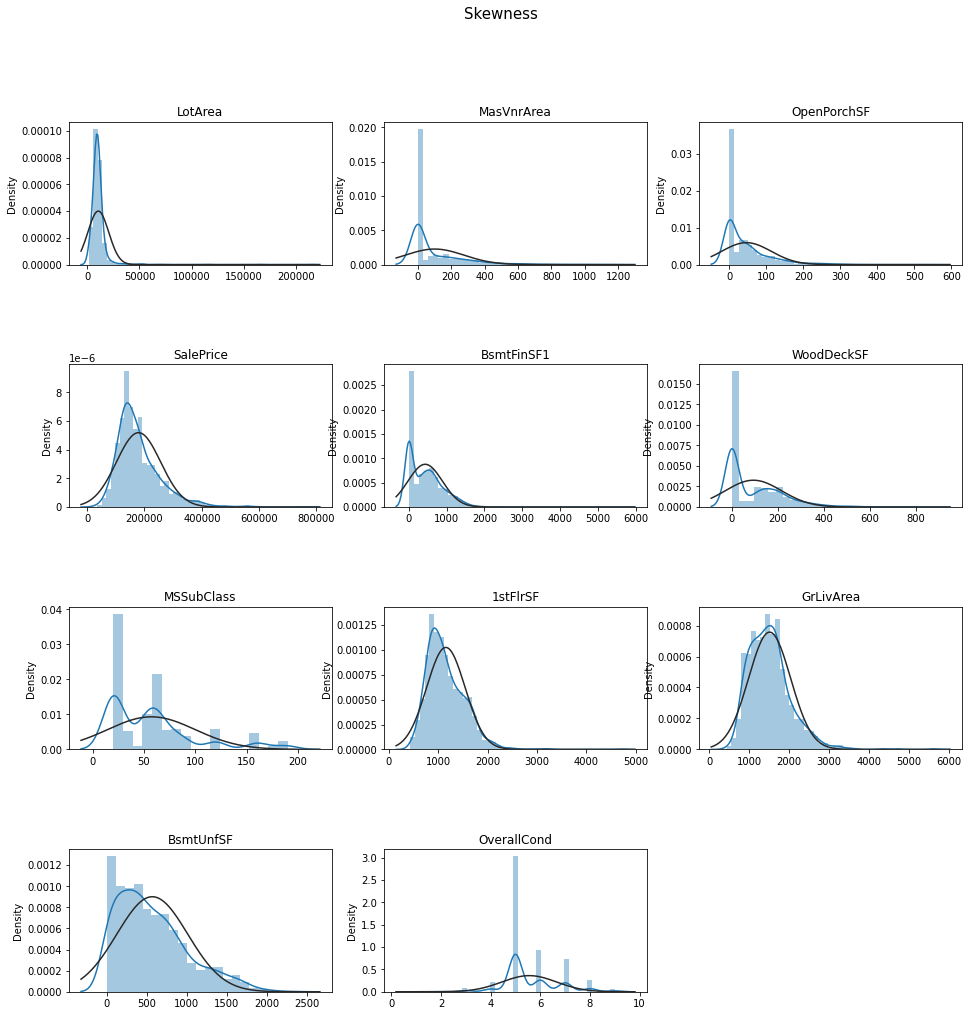

In [79]:
plt.figure(1, figsize=(16, 16))

plt.suptitle('Skewness', fontsize=15)
plt.subplot(4, 3, 1)
sb.distplot(train_df['LotArea'], fit=stats.norm).set(xlabel=None)
plt.title('LotArea')

plt.subplot(4, 3, 2)
sb.distplot(train_df['MasVnrArea'], fit=stats.norm).set(xlabel=None)
plt.title('MasVnrArea')

plt.subplot(4, 3, 3)
sb.distplot(train_df['OpenPorchSF'], fit=stats.norm).set(xlabel=None)
plt.title('OpenPorchSF')

plt.subplot(4, 3, 4)
sb.distplot(train_df['SalePrice'], fit=stats.norm).set(xlabel=None)
plt.title('SalePrice')

plt.subplot(4, 3, 5)
sb.distplot(train_df['BsmtFinSF1'], fit=stats.norm).set(xlabel=None)
plt.title('BsmtFinSF1')

plt.subplot(4, 3, 6)
sb.distplot(train_df['WoodDeckSF'], fit=stats.norm).set(xlabel=None)
plt.title('WoodDeckSF')

plt.subplot(4, 3, 7)
sb.distplot(train_df['MSSubClass'], fit=stats.norm).set(xlabel=None)
plt.title('MSSubClass')

plt.subplot(4, 3, 8)
sb.distplot(train_df['1stFlrSF'], fit=stats.norm).set(xlabel=None)
plt.title('1stFlrSF')

plt.subplot(4, 3, 9)
sb.distplot(train_df['GrLivArea'], fit=stats.norm).set(xlabel=None)
plt.title('GrLivArea')

plt.subplot(4, 3, 10)
sb.distplot(train_df['BsmtUnfSF'], fit=stats.norm).set(xlabel=None)
plt.title('BsmtUnfSF')

plt.subplot(4, 3, 11)
sb.distplot(train_df['OverallCond'], fit=stats.norm).set(xlabel=None)
plt.title('OverallCond')

plt.subplots_adjust(wspace=0.2, hspace=0.7)

### Log transform for right skewed features, raise to power for left skewed ones

In [80]:
train_df['LotArea'] = np.log1p(train_df.LotArea)
train_df['MasVnrArea'] = np.log1p(train_df.MasVnrArea)
train_df['OpenPorchSF'] = np.log1p(train_df.OpenPorchSF)
train_df['SalePrice'] = np.log1p(train_df.SalePrice)
train_df['BsmtFinSF1'] = np.log1p(train_df.BsmtFinSF1)
train_df['WoodDeckSF'] = np.log1p(train_df.WoodDeckSF)
train_df['MSSubClass'] = np.log1p(train_df.MSSubClass)
train_df['1stFlrSF'] = np.log1p(train_df['1stFlrSF'])
train_df['GrLivArea'] = np.log1p(train_df.GrLivArea)
train_df['BsmtUnfSF'] = np.log1p(train_df.BsmtUnfSF)
train_df['OverallCond'] = np.log1p(train_df.OverallCond)


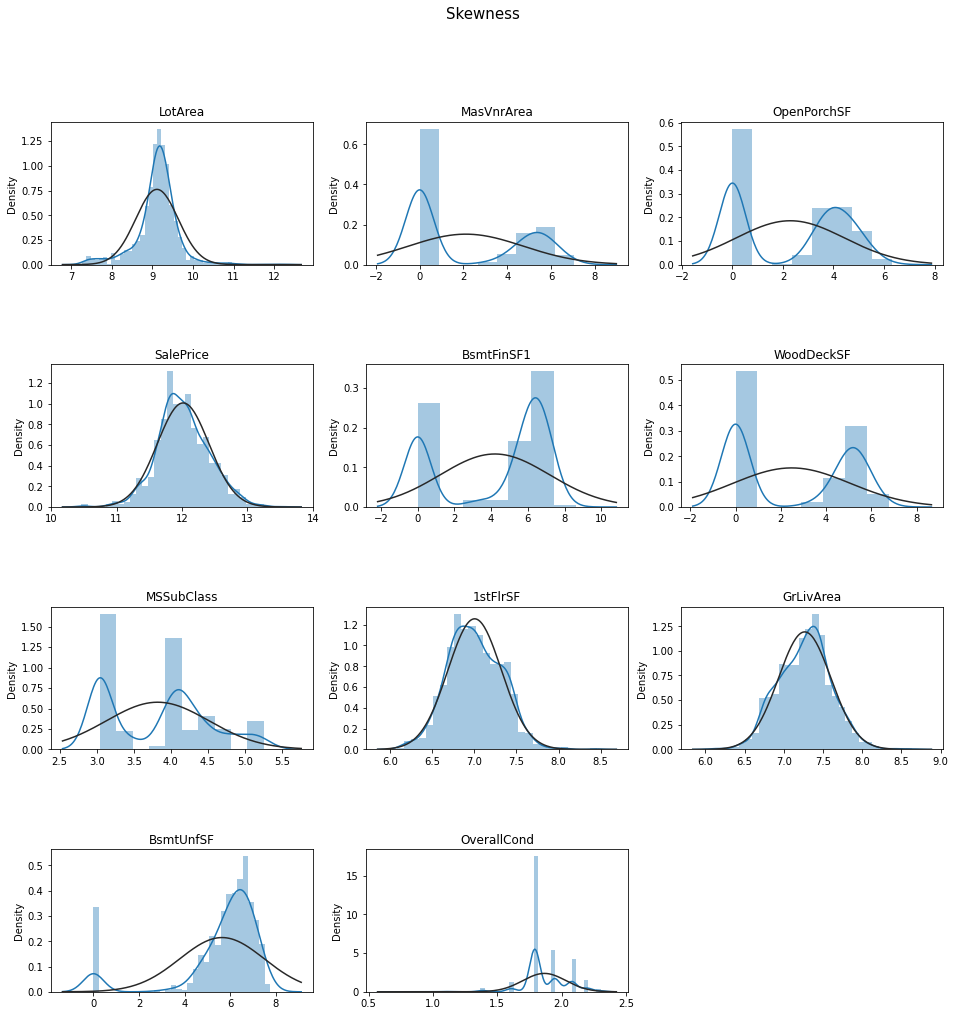

In [81]:
plt.figure(1, figsize=(16, 16))

plt.suptitle('Skewness', fontsize=15)
plt.subplot(4, 3, 1)
sb.distplot(train_df['LotArea'], fit=stats.norm).set(xlabel=None)
plt.title('LotArea')

plt.subplot(4, 3, 2)
sb.distplot(train_df['MasVnrArea'], fit=stats.norm).set(xlabel=None)
plt.title('MasVnrArea')

plt.subplot(4, 3, 3)
sb.distplot(train_df['OpenPorchSF'], fit=stats.norm).set(xlabel=None)
plt.title('OpenPorchSF')

plt.subplot(4, 3, 4)
sb.distplot(train_df['SalePrice'], fit=stats.norm).set(xlabel=None)
plt.title('SalePrice')

plt.subplot(4, 3, 5)
sb.distplot(train_df['BsmtFinSF1'], fit=stats.norm).set(xlabel=None)
plt.title('BsmtFinSF1')

plt.subplot(4, 3, 6)
sb.distplot(train_df['WoodDeckSF'], fit=stats.norm).set(xlabel=None)
plt.title('WoodDeckSF')

plt.subplot(4, 3, 7)
sb.distplot(train_df['MSSubClass'], fit=stats.norm).set(xlabel=None)
plt.title('MSSubClass')

plt.subplot(4, 3, 8)
sb.distplot(train_df['1stFlrSF'], fit=stats.norm).set(xlabel=None)
plt.title('1stFlrSF')

plt.subplot(4, 3, 9)
sb.distplot(train_df['GrLivArea'], fit=stats.norm).set(xlabel=None)
plt.title('GrLivArea')

plt.subplot(4, 3, 10)
sb.distplot(train_df['BsmtUnfSF'], fit=stats.norm).set(xlabel=None)
plt.title('BsmtUnfSF')

plt.subplot(4, 3, 11)
sb.distplot(train_df['OverallCond'], fit=stats.norm).set(xlabel=None)
plt.title('OverallCond')

plt.subplots_adjust(wspace=0.2, hspace=0.7)

### Result is much closer to normal distribution

## Now that columns have been dropped, same can be applied to validation data

### Remove dropped columns

In [82]:
train_dropped_columns = [col for col in cv_df.columns if col not in train_df.columns]
cv_df = cv_df.drop(columns=train_dropped_columns)

### Ordinal encoding

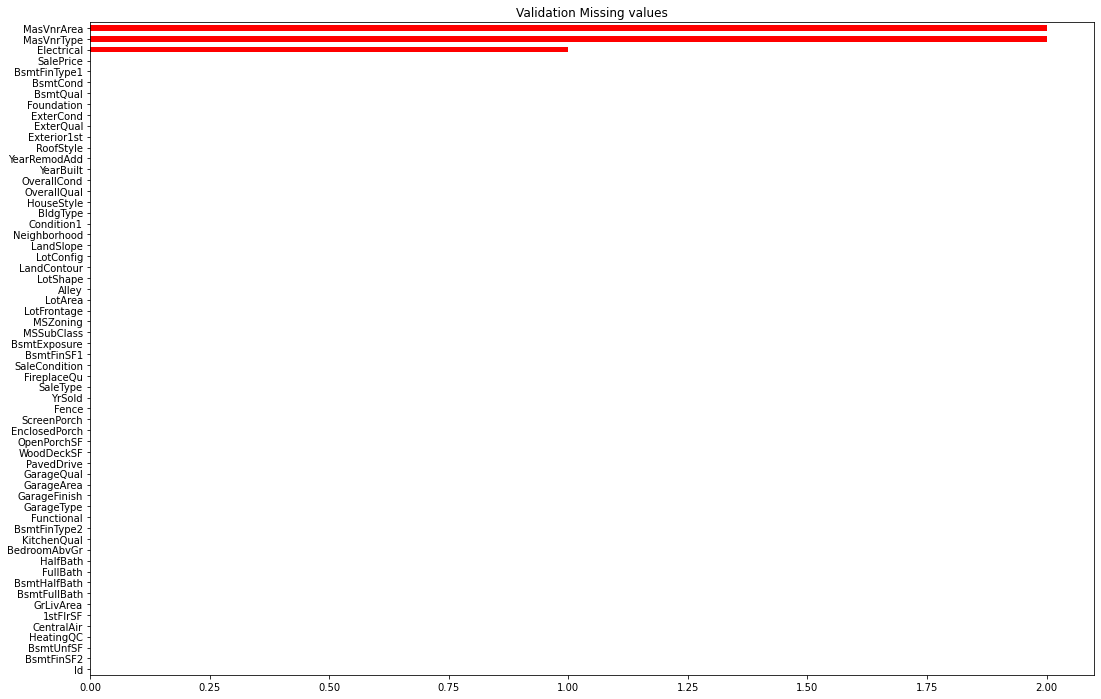

In [83]:
cv_df['MSZoning'] = cv_df.MSZoning.replace(zoning_mapper)
cv_df['Alley'] = cv_df.Alley.replace(street_mapper)
cv_df['LandSlope'] = cv_df.LandSlope.replace(slope_mapper)
cv_df['ExterQual'] = cv_df.ExterQual.replace(quality_mapper)
cv_df['ExterCond'] = cv_df.ExterCond.replace(quality_mapper)
cv_df['BsmtQual'] = cv_df.BsmtQual.replace(quality_mapper)
cv_df['BsmtCond'] = cv_df.BsmtCond.replace(quality_mapper)
cv_df['FireplaceQu'] = cv_df.FireplaceQu.replace(quality_mapper)
cv_df['KitchenQual'] = cv_df.KitchenQual.replace(quality_mapper)
cv_df['HeatingQC'] = cv_df.HeatingQC.replace(quality_mapper)
cv_df['GarageQual'] = cv_df.GarageQual.replace(quality_mapper)
cv_df['BsmtExposure'] = cv_df.BsmtExposure.replace(bsmtexp_mapper)
cv_df['BsmtFinType1'] = cv_df.BsmtFinType1.replace(bsmtfin_mapper)
cv_df['BsmtFinType2'] = cv_df.BsmtFinType2.replace(bsmtfin_mapper)
cv_df['CentralAir'] = cv_df.CentralAir.replace(central_air_mapper)
cv_df['Electrical'] = cv_df.Electrical.replace(electrical_mapper)
cv_df['Functional'] = cv_df.Functional.replace(functionality_mapper)
cv_df['GarageFinish'] = cv_df.GarageFinish.replace(garage_finish_mapper)
cv_df['Fence'] = cv_df.Fence.replace(fence_mapper)
cv_df['PavedDrive'] = cv_df.PavedDrive.replace(paved_drive_mapper)
cv_df['GarageType'] = cv_df.GarageType.fillna('None')
cv_df['LotFrontage'] = cv_df.LotFrontage.fillna(0)

plt.figure(figsize=(18, 12))
cv_df.isna().sum().sort_values().plot.barh(color='red')
plt.title('Validation Missing values')
plt.show()

### Use fill_na_cols function (same as with train_df) defined above

In [84]:
fill_na_cols(cv_df)
print('Remaining null values: ', cv_df.isna().sum().sum())

Remaining null values:  0


### Same transformations as with train dataset to reduce skewness

In [85]:
cv_df['LotArea'] = np.log1p(cv_df.LotArea)
cv_df['MasVnrArea'] = np.log1p(cv_df.MasVnrArea)
cv_df['OpenPorchSF'] = np.log1p(cv_df.OpenPorchSF)
cv_df['BsmtFinSF1'] = np.log1p(cv_df.BsmtFinSF1)
cv_df['WoodDeckSF'] = np.log1p(cv_df.WoodDeckSF)
cv_df['MSSubClass'] = np.log1p(cv_df.MSSubClass)
cv_df['1stFlrSF'] = np.log1p(cv_df['1stFlrSF'])
cv_df['GrLivArea'] = np.log1p(cv_df.GrLivArea)
cv_df['BsmtUnfSF'] = np.log1p(cv_df.BsmtUnfSF)
cv_df['OverallCond'] = np.log1p(cv_df.OverallCond)
cv_df['SalePrice'] = np.log1p(cv_df.SalePrice)

### cv data null values filled, next step is to encode nominal columns

In [86]:
train_df_before_encoding = train_df.copy()
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'Fence', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

### Checking unique value count for each nominal column

In [87]:
# Next step is to encode categorical columns
columns_to_encode = ['LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',\
                     'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'Foundation',\
                     'GarageType', 'SaleType', 'SaleCondition']
columns_without_encoding = [col for col in train_df.columns if col not in columns_to_encode]
unique_value_count = []
for col in columns_to_encode:
    unique_value_count.append(train_df[col].nunique())
[*zip(columns_to_encode, unique_value_count)]

[('LotShape', 4),
 ('LandContour', 4),
 ('LotConfig', 5),
 ('LandSlope', 3),
 ('Neighborhood', 25),
 ('Condition1', 8),
 ('BldgType', 5),
 ('HouseStyle', 8),
 ('RoofStyle', 6),
 ('Exterior1st', 15),
 ('MasVnrType', 4),
 ('Foundation', 6),
 ('GarageType', 7),
 ('SaleType', 9),
 ('SaleCondition', 6)]

### Using OneHot encoding

In [88]:
lot_shape_dummies = pd.get_dummies(train_df.LotShape, prefix='LotShape')
land_contour_dummies = pd.get_dummies(train_df.LandContour, prefix='LandContour')
lot_config_dummies = pd.get_dummies(train_df.LotConfig, prefix='LotConfig')
land_slope_dummies = pd.get_dummies(train_df.LandSlope, prefix='LandSlope')
condition_dummies = pd.get_dummies(train_df.Condition1, prefix='Condition')
bldg_type_dummies = pd.get_dummies(train_df.BldgType, prefix='BldgType')
house_style_dummies = pd.get_dummies(train_df.HouseStyle, prefix='HouseStyle')
roof_style_dummies = pd.get_dummies(train_df.RoofStyle, prefix='RoofStyle')
masvnr_type_dummies = pd.get_dummies(train_df.MasVnrType, prefix='MasVnrType')
foundation_dummies = pd.get_dummies(train_df.Foundation, prefix='Foundation')
garage_type_dummies = pd.get_dummies(train_df.GarageType, prefix='GarageType')
sale_type_dummies = pd.get_dummies(train_df.SaleType, prefix='SaleType')
sale_condition_dummies = pd.get_dummies(train_df.SaleCondition, prefix='SaleCondition')

neighborhood_dummies = pd.get_dummies(train_df.Neighborhood, prefix='Neighborhood')
exterior1st_dummies = pd.get_dummies(train_df.Exterior1st, prefix='Exterior1st')

train_df = pd.concat([train_df, lot_shape_dummies, land_contour_dummies, lot_config_dummies, land_slope_dummies, 
                      condition_dummies, bldg_type_dummies, house_style_dummies, roof_style_dummies, 
                      masvnr_type_dummies, foundation_dummies, garage_type_dummies, sale_type_dummies, 
                      sale_condition_dummies, neighborhood_dummies, exterior1st_dummies], axis=1)

# Binary Encoder increased cost and column count isn't really that much anyway so

# binary_encoder = ce.BinaryEncoder(cols=['Neighborhood', 'Exterior1st'])
# train_df = binary_encoder.fit_transform(train_df)

# columns_to_encode.remove('Neighborhood')
# columns_to_encode.remove('Exterior1st')

train_df = train_df.drop(columns=columns_to_encode)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,YrSold,SalePrice,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_1,LandSlope_2,LandSlope_3,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
955,956,4.510860,4,82.0,8.873048,0,6,1.945910,1946,1950,6.049733,3,3,4,3,1,3,6.184149,1,0,6.206576,3,0,1,6.887553,7.580189,0,0,2,0,4,3,7,0,1,492,3,3,0.000000,0.000000,0,0,0,2007,11.884496,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1278,1279,4.110874,6,75.0,9.156306,0,8,1.791759,2002,2002,0.000000,4,3,4,3,1,6,6.690842,1,0,5.783825,5,1,3,7.029088,7.616776,1,0,2,1,3,4,7,4,2,577,3,3,0.000000,5.356586,0,0,0,2008,12.375820,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
667,668,3.044522,6,65.0,9.002824,0,6,1.791759,1994,1998,5.556828,3,3,4,3,1,6,7.037906,1,0,5.602119,5,1,3,7.426549,7.426549,1,0,2,0,3,4,7,2,2,575,3,3,5.416100,3.761200,0,0,0,2008,12.173038,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
543,544,4.795791,4,34.0,8.308692,0,7,1.791759,1998,1998,5.209486,3,3,4,3,3,6,6.371612,2,139,0.000000,5,1,3,6.643790,6.643790,1,0,1,0,1,3,7,0,3,367,3,3,4.795791,3.713572,0,0,0,2007,11.798112,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,

### Encode validation set

In [89]:
cv_before_encoding = cv_df.copy()
cv_columns_to_encode = ['LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',\
                        'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'Foundation',\
                        'GarageType', 'SaleType', 'SaleCondition']
cv_lot_shape_dummies = pd.get_dummies(cv_df.LotShape, prefix='LotShape')
cv_land_contour_dummies = pd.get_dummies(cv_df.LandContour, prefix='LandContour')
cv_lot_config_dummies = pd.get_dummies(cv_df.LotConfig, prefix='LotConfig')
cv_land_slope_dummies = pd.get_dummies(cv_df.LandSlope, prefix='LandSlope')
cv_condition_dummies = pd.get_dummies(cv_df.Condition1, prefix='Condition')
cv_bldg_type_dummies = pd.get_dummies(cv_df.BldgType, prefix='BldgType')
cv_house_style_dummies = pd.get_dummies(cv_df.HouseStyle, prefix='HouseStyle')
cv_roof_style_dummies = pd.get_dummies(cv_df.RoofStyle, prefix='RoofStyle')
cv_masvnr_type_dummies = pd.get_dummies(cv_df.MasVnrType, prefix='MasVnrType')
cv_foundation_dummies = pd.get_dummies(cv_df.Foundation, prefix='Foundation')
cv_garage_type_dummies = pd.get_dummies(cv_df.GarageType, prefix='GarageType')
cv_sale_type_dummies = pd.get_dummies(cv_df.SaleType, prefix='SaleType')
cv_sale_condition_dummies = pd.get_dummies(cv_df.SaleCondition, prefix='SaleCondition')

cv_neighborhood_dummies = pd.get_dummies(cv_df.Neighborhood, prefix='Neighborhood')
cv_exterior1st_dummies = pd.get_dummies(cv_df.Exterior1st, prefix='Exterior1st')

cv_df = pd.concat([cv_df, cv_lot_shape_dummies, cv_land_contour_dummies, cv_lot_config_dummies, 
                   cv_land_slope_dummies, cv_condition_dummies, cv_bldg_type_dummies, cv_house_style_dummies, 
                   cv_roof_style_dummies, cv_masvnr_type_dummies, cv_foundation_dummies,
                   cv_garage_type_dummies, cv_sale_type_dummies, cv_sale_condition_dummies, 
                   cv_neighborhood_dummies, cv_exterior1st_dummies], axis=1)

cv_df = cv_df.drop(columns=cv_columns_to_encode)
cv_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,YrSold,SalePrice,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_1,LandSlope_2,LandSlope_3,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosN,Condition_RRAn,Condition_RRNe,Condition_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_COD,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
932,933,3.044522,6,84.0,9.364862,0,9,1.791759,2006,2006,5.713733,5,3,5,4,1,1,0.000000,1,0,7.552762,5,1,3.0,7.552762,7.552762,0,0,2,0,3,5,7,4,3,788,3,3,0.000000,5.257495,0,0,0,2007,12.676079,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
409,410,4.110874,2,85.0,9.287394,0,8,1.791759,2007,2008,4.615121,4,3,5,3,1,6,6.672033,1,0,5.505332,5,1,3.0,6.957497,7.639642,1,0,2,1,3,5,7,4,3,836,3,3,0.000000,4.634729,0,0,0,2008,12.735968,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1271,1272,3.044522,6,0.0,9.122274,0,6,2.079442,1968,1968,0.000000,3,3,3,3,1,1,0.000000,1,0,7.306531,4,1,3.0,7.306531,7.306531,0,0,2,0,3,4,7,4,2,462,3,3,0.000000,0.000000,0,0,0,2009,12.132162,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
270,271,4.110874,2,84.0,9.280706,0,8,1.791759,2006,2006,0.000000,4,3,4,3,2,1,0.000000,1,0,6.999422,4,1,3.0,6.999422,7.570443,0,0,2,1,3,4,7,4,2,1053,3,3,5.262690,3.951244,0,0,0,2006,12.491255,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1290,1291,4.394449,6,0.0,9.554852,0,5,2.079442,1964,1964,4.465908,3,3,3,3,3,6,6.922644,1,0,4.934474,3,1,3.0,7.05

### Check for missing columns from each dataset

In [90]:
train_missing_columns = []
for col in cv_df.columns:
    if col not in train_df.columns:
        train_missing_columns.append(col)

cv_missing_columns = []
for col in train_df.columns:
    if col not in cv_df.columns:
        cv_missing_columns.append(col)
train_missing_columns, cv_missing_columns

(['Condition_RRNe'],
 ['Condition_PosA',
  'Condition_RRAe',
  'Foundation_Wood',
  'GarageType_2Types',
  'SaleType_Con',
  'SaleType_ConLw',
  'SaleType_Oth',
  'Neighborhood_Blueste',
  'Exterior1st_AsphShn',
  'Exterior1st_BrkComm',
  'Exterior1st_CBlock',
  'Exterior1st_ImStucc',
  'Exterior1st_Stone'])

### Add train dataframe columns that are missing from cv

In [91]:
cv_df = cv_df.drop(columns=['Condition_RRNe'])
train_df_final_columns = train_df.columns
cv_full_df = pd.DataFrame(columns=train_df_final_columns)
cv_full_df.columns, train_df.columns

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        ...
        'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
        'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
        'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
        'Exterior1st_WdShing'],
       dtype='object', length=160),
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        ...
        'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
        'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
        'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
        'Exterior1st_WdShing'],
       dtype='object', length=160))

### Normalize train data by subtracting mean and dividing by standard deviation for each column, separate input (features excluding SalePrice) and output columns (SalePrice)

In [92]:
train_df = train_df.drop(columns=['Id'])
X = train_df.drop(columns=['SalePrice'])
X = (X - X.mean()) / X.std()
X.insert(0, 'Ones', 1)
y = train_df.loc[:, ['SalePrice']]
X.shape, y.shape

((1168, 159), (1168, 1))

### Convert pandas dataframes to numpy matrices, create theta zero vector (as a matrix)

In [93]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros(X.shape[1]))
X.shape, theta.shape, y.shape

((1168, 159), (1, 159), (1168, 1))

### Run gradient descent algorithm, print cost before and after

In [94]:
def computeCost(X, y, theta):
    return np.sum(np.square(X * theta.T - y)) / (2.0 * X.shape[0])

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y  # predicted - actual result
        
        for j in range(parameters): # for each theta
            costDeriv = np.sum(np.multiply(error, X[:, j])) / X.shape[0]
            temp[0, j] = theta[0, j] - alpha * costDeriv
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

alpha = 0.05
iters = 1000
print(computeCost(X, y, theta))
thetas, cost = gradientDescent(X, y, theta, alpha, iters)
print(cost[-1])

72.27583591157749
0.006157702091418727


### Plot error vs number of iterations graph

Text(0.5, 1.0, 'Error vs. Training Epoch')

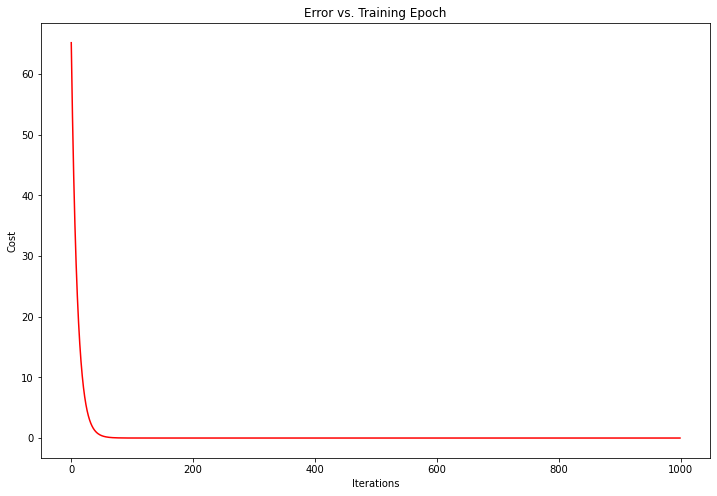

In [95]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### Lets lower the amount of iterations since it doesnt change much after ~100

72.27583591157749
0.00890350855595483


Text(0.5, 1.0, 'Error vs. Training Epoch')

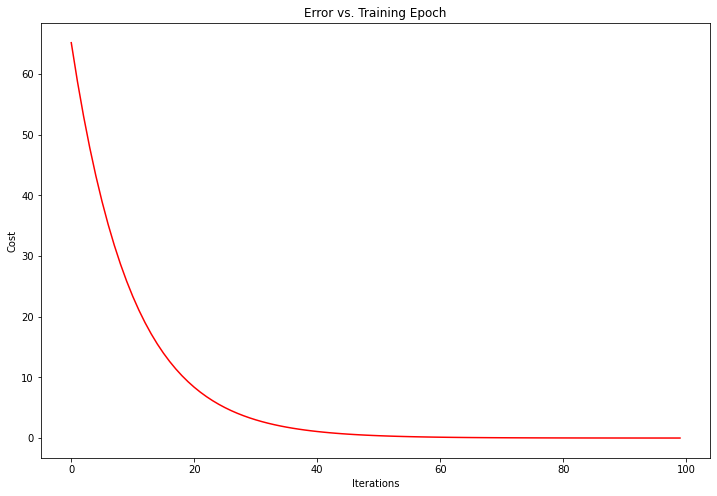

In [96]:
alpha = 0.05
iters = 100
print(computeCost(X, y, theta))
thetas, cost = gradientDescent(X, y, theta, alpha, iters)
print(cost[-1])

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### We can make the curve more steep by increasing learning rate, that way it approaches the minimum faster

72.27583591157749
0.006234092611719699


Text(0.5, 1.0, 'Error vs. Training Epoch')

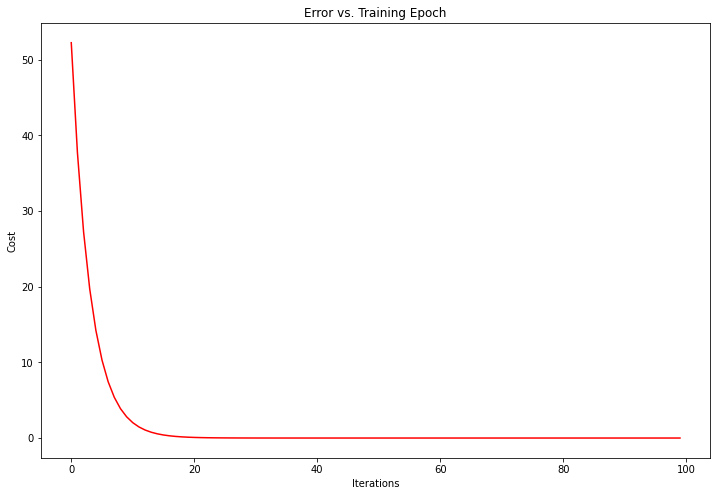

In [97]:
alpha = 0.15
iters = 100
print(computeCost(X, y, theta))
thetas, cost = gradientDescent(X, y, theta, alpha, iters)
print(computeCost(X, y, thetas))

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### Copy validation set data to columns that had already been there before adding new cols from train

In [98]:
cv_full_df[cv_df.columns] = cv_df
cv_full_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,YrSold,SalePrice,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_1,LandSlope_2,LandSlope_3,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
932,933,3.044522,6,84.0,9.364862,0,9,1.791759,2006,2006,5.713733,5,3,5,4,1,1,0.000000,1,0,7.552762,5,1,3.0,7.552762,7.552762,0,0,2,0,3,5,7,4,3,788,3,3,0.000000,5.257495,0,0,0,2007,12.676079,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,NaN,0,NaN,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,NaN,NaN,1,0,0,0,0,0,0,0,NaN,0,0,NaN,0,NaN,1,0,0,0,0,1,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,0,NaN,0,0,NaN,0,0,NaN,0,1,0,0
409,410,4.110874,2,85.0,9.287394,0,8,1.791759,2007,2008,4.615121,4,3,5,3,1,6,6.672033,1,0,5.505332,5,1,3.0,6.957497,7.639642,1,0,2,1,3,5,7,4,3,836,3,3,0.000000,4.634729,0,0,0,2008,12.735968,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,NaN,0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,NaN,NaN,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,0,0,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,0,NaN,0,0,NaN,0,0,NaN,0,1,0,0
1271,1272,3.044522,6,0.0,9.122274,0,6,2.079442,1968,1968,0.000000,3,3,3,3,1,1,0.000000,1,0,7.306531,4,1,3.0,7.306531,7.306531,0,0,2,0,3,4,7,4,2,462,3,3,0.000000,0.000000,0,0,0,2009,12.132162,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,NaN,1,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,NaN,0,0,NaN,0,NaN,1,0,0,0,0,1,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,NaN,0,0,NaN,0,0,NaN,0,0,0,0
270,271,4.110874,2,84.0,9.280706,0,8,1.791759,2006,2006,0.000000,4,3,4,3,2,1,0.000000,1,0,6.999422,4,1,3.0,6.999422,7.570443,0,0,2,1,3,4,7,4,2,1053,3,3

### Drop id column

In [99]:
cv_full_df = cv_full_df.drop(columns=['Id'])
print('Null values:', cv_full_df.isna().sum().sum())

Null values: 3796


### Normalize first, then fill missing values (which are caused by new columns from train df) to avoid division by zero (if all values are the same standard deviation is 0)

In [100]:
cv_X = cv_full_df.drop(columns=['SalePrice'])
cv_X = (cv_X - cv_X.mean()) / cv_X.std()
cv_X = cv_X.fillna(0)
cv_X.insert(0, 'Ones', 1)
cv_y = cv_full_df.loc[:, ['SalePrice']]
cv_X = np.matrix(cv_X.values)
cv_y = np.matrix(cv_y.values)
cv_X.shape, cv_y.shape, thetas.shape

((292, 159), (292, 1), (1, 159))

### Check cost for this model

In [101]:
predicted_price = np.exp(cv_X * thetas.T)
computeCost(cv_X, cv_y, thetas)

0.008074050472900617

### Train dataset predicted (blue) vs actual (red) prices

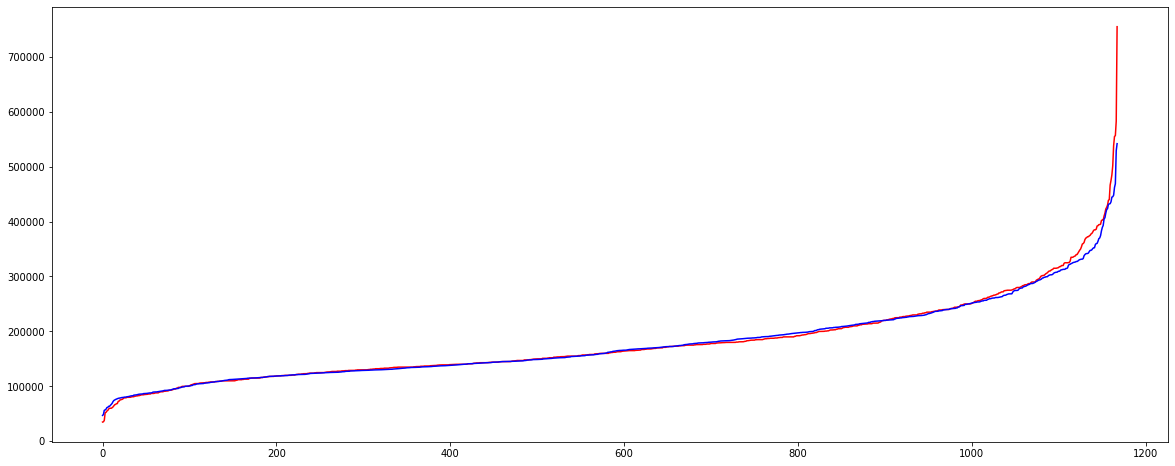

In [102]:
plt.figure(figsize=(20, 8))
plt.plot(range(1168), np.exp(train_df.SalePrice).sort_values(), 'r-')
plt.plot(range(1168), np.sort(np.exp(X * thetas.T), axis=0), 'b-')

### Validation dataset predicted price (blue) vs actual (red)

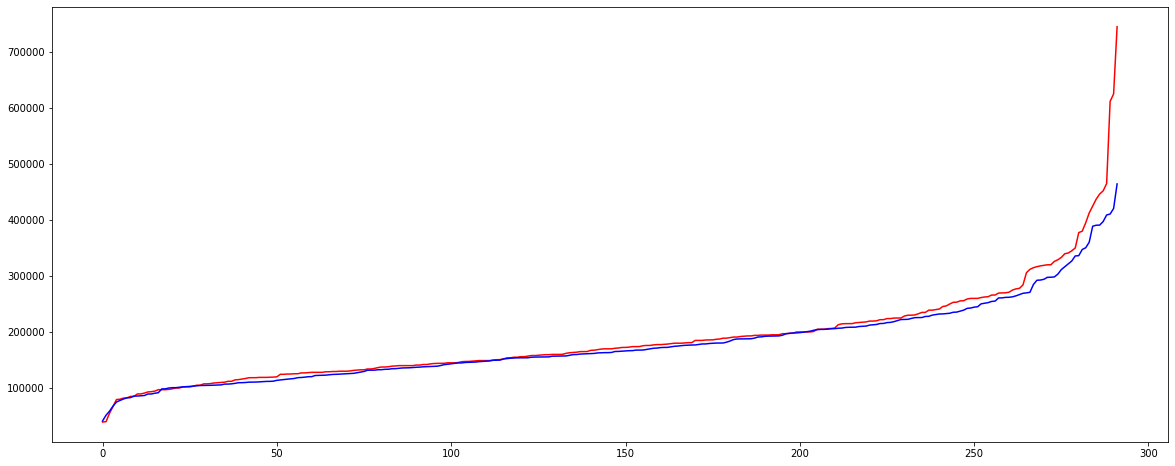

In [103]:
pred_price_df = pd.DataFrame(predicted_price, columns=['Price'])
plt.figure(figsize=(20, 8))
# plt.scatter(range(292), pp_df)
# plt.scatter(range(292), np.exp(cv_before_encoding.SalePrice))
plt.plot(range(292), np.exp(cv_before_encoding.SalePrice.sort_values()), 'r-')
plt.plot(range(292), np.matrix(pred_price_df.sort_values('Price')), 'b-')

### Compute costs as training set size increases to plot a learning curve to see whether we have underfitting/overfitting

In [104]:
theta_list = []
train_cost_list = []
for i in range(25, 1000, 25):
    temp_theta, temp_cost = gradientDescent(X[:i, :], y[:i, :], theta, 0.13, 40)
    theta_list.append(temp_theta)
    train_cost_list.append(computeCost(X[:i, :], y[:i, :], temp_theta))
predicted_prices_cost = []
for th in theta_list:
    predicted_prices_cost.append(computeCost(cv_X, cv_y, th))

### Plot learning curve, gradually shift X axis to the left to magnify and visually compare functions

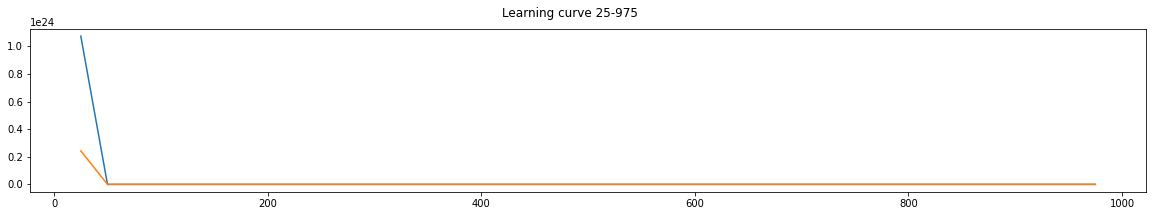

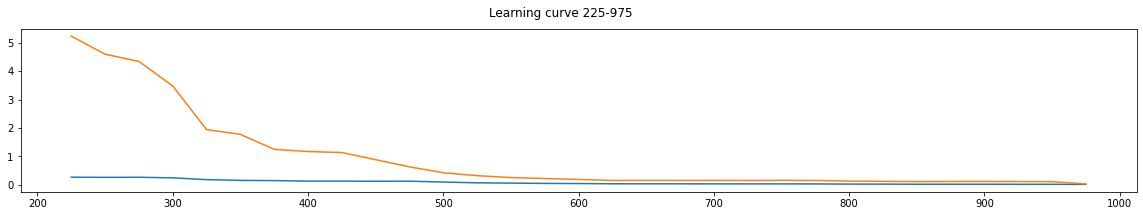

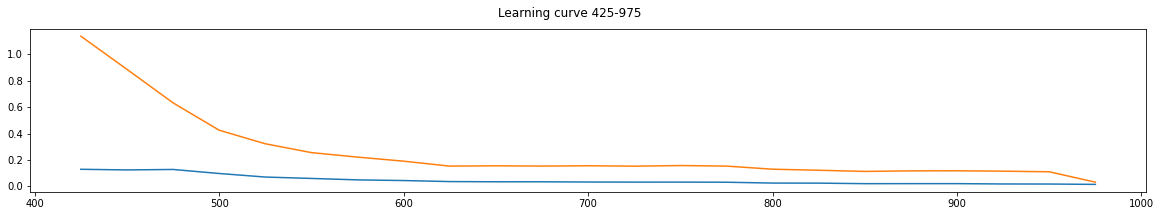

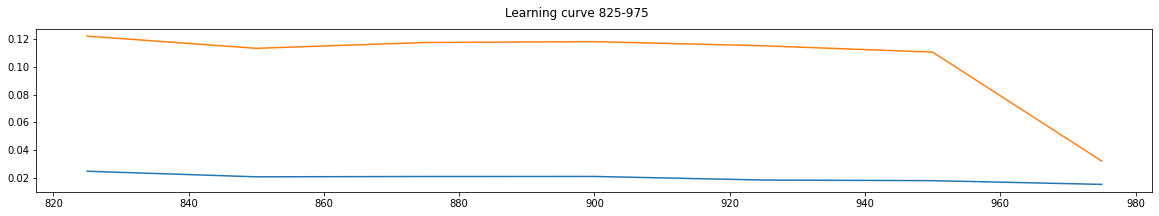

In [105]:
plt.figure(1, figsize=(20, 3))
plt.suptitle('Learning curve 25-975')
plt.plot(range(25, 1000, 25), train_cost_list)
plt.plot(range(25, 1000, 25), predicted_prices_cost)

plt.figure(2, figsize=(20, 3))
plt.suptitle('Learning curve 225-975')
plt.plot(range(225, 1000, 25), train_cost_list[8:])
plt.plot(range(225, 1000, 25), predicted_prices_cost[8:])

plt.figure(3, figsize=(20, 3))
plt.suptitle('Learning curve 425-975')
plt.plot(range(425, 1000, 25), train_cost_list[16:])
plt.plot(range(425, 1000, 25), predicted_prices_cost[16:])

plt.figure(4, figsize=(20, 3))
plt.suptitle('Learning curve 825-975')
plt.plot(range(825, 1000, 25), train_cost_list[32:])
plt.plot(range(825, 1000, 25), predicted_prices_cost[32:])

### Graph seems like an example of a good fit even without regularization and non-linear parameters, train and validation datasets seem to be good representatives, but the result can probably be improved

### Let's try adding non-linear features first

In [106]:
# Product of quality and condition seems reasonable, if both are high the result is high, if both are low
# the result is low and if one is high and the other is low then the result is somewhere between
train_df['OverallQualCond'] = train_df.OverallQual * train_df.OverallCond
# As mentioned in correlation part, OverallQual seems to be in quadratic relationship with SalePrice
train_df['OverallQualSq'] = train_df.OverallQual**2
train_df['ExterQualCond'] = train_df.ExterQual * train_df.ExterCond
# Get number of all full and half bathrooms in the house
train_df['FullBathSum'] = train_df.BsmtFullBath + train_df.FullBath
train_df['HalfBathSum'] = train_df.BsmtHalfBath + train_df.HalfBath
train_df['BsmtQualCond'] = train_df.BsmtQual * train_df.BsmtCond
train_df['OverallQualCb'] = train_df.OverallQual**3

cv_full_df['OverallQualCond'] = cv_full_df.OverallQual * cv_full_df.OverallCond
cv_full_df['OverallQualSq'] = cv_full_df.OverallQual**2
cv_full_df['ExterQualCond'] = cv_full_df.ExterQual * cv_full_df.ExterCond
cv_full_df['FullBathSum'] = cv_full_df.BsmtFullBath + cv_full_df.FullBath
cv_full_df['HalfBathSum'] = cv_full_df.BsmtHalfBath + cv_full_df.HalfBath
cv_full_df['BsmtQualCond'] = cv_full_df.BsmtQual * cv_full_df.BsmtCond
cv_full_df['OverallQualCb'] = cv_full_df.OverallQual**3

train_df.shape, cv_full_df.shape

((1168, 166), (292, 166))

72.27583591157749
0.006138296894461411


Text(0.5, 1.0, 'Error vs. Training Epoch')

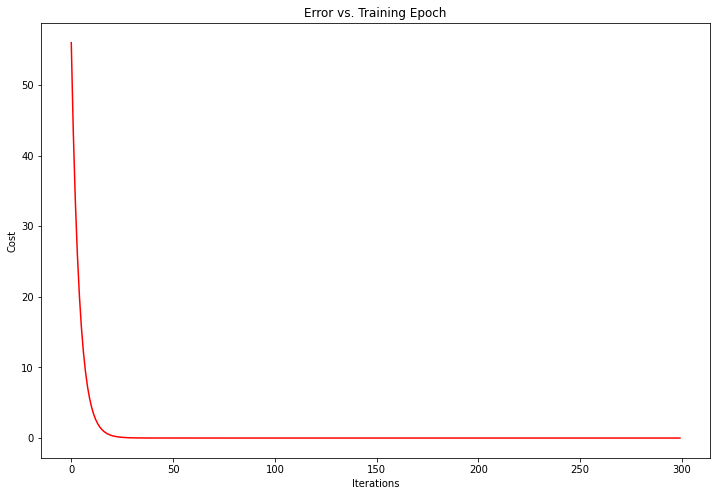

In [107]:
X = train_df.drop(columns=['SalePrice'])
X = (X - X.mean()) / X.std()
X.insert(0, 'Ones', 1)
y = train_df.loc[:, ['SalePrice']]

X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros(X.shape[1]))

alpha = 0.12
iters = 300
print(computeCost(X, y, theta))
thetas, cost = gradientDescent(X, y, theta, alpha, iters)
print(cost[-1])

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [108]:
cv_X = cv_full_df.drop(columns=['SalePrice'])
cv_X = (cv_X - cv_X.mean()) / cv_X.std()
cv_X = cv_X.fillna(0)
cv_X.insert(0, 'Ones', 1)
cv_y = cv_full_df.loc[:, ['SalePrice']]
cv_X = np.matrix(cv_X.values)
cv_y = np.matrix(cv_y.values)

predicted_price = np.exp(cv_X * thetas.T)
computeCost(cv_X, cv_y, thetas)

0.007947439989957734

### Added features didn't dicrease validation set cost significantly, let's try deleting some of them and check again

In [109]:
X_1 = train_df.drop(columns=['SalePrice', 'FullBathSum', 'HalfBathSum', 'ExterQualCond', 'BsmtQualCond'])
X_1 = (X_1 - X_1.mean()) / X_1.std()
X_1.insert(0, 'Ones', 1)
y = train_df.loc[:, ['SalePrice']]

X_1 = np.matrix(X_1.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros(X_1.shape[1]))

print('Cols 1: ', computeCost(X_1, y, theta))
thetas_1, cost_1 = gradientDescent(X_1, y, theta, alpha, iters)
print(cost_1[-1])

X_2 = train_df.drop(columns=['SalePrice', 'FullBathSum', 'HalfBathSum', 'BsmtQualCond'])
X_2 = (X_2 - X_2.mean()) / X_2.std()
X_2.insert(0, 'Ones', 1)

X_2 = np.matrix(X_2.values)
theta = np.matrix(np.zeros(X_2.shape[1]))

print('Cols 2: ', computeCost(X_2, y, theta))
thetas_2, cost_2 = gradientDescent(X_2, y, theta, alpha, iters)
print(cost_2[-1])

X_3 = train_df.drop(columns=['SalePrice', 'BsmtQualCond'])
X_3 = (X_3 - X_3.mean()) / X_3.std()
X_3.insert(0, 'Ones', 1)

X_3 = np.matrix(X_3.values)
theta = np.matrix(np.zeros(X_3.shape[1]))

print('Cols 3: ', computeCost(X_3, y, theta))
thetas_3, cost_3 = gradientDescent(X_3, y, theta, alpha, iters)
print(cost_3[-1])

Cols 1:  72.27583591157749
0.006142693345949181
Cols 2:  72.27583591157749
0.006139366310819143
Cols 3:  72.27583591157749
0.006139948608643188


### Checking validation costs for each model

In [110]:
cv_X_1 = cv_full_df.drop(columns=['SalePrice', 'FullBathSum', 'HalfBathSum', 'ExterQualCond', 'BsmtQualCond'])
cv_X_1 = (cv_X_1 - cv_X_1.mean()) / cv_X_1.std()
cv_X_1 = cv_X_1.fillna(0)
cv_X_1.insert(0, 'Ones', 1)
cv_y = cv_full_df.loc[:, ['SalePrice']]
cv_X_1 = np.matrix(cv_X_1.values)
cv_y = np.matrix(cv_y.values)
print('Cols 1: ', computeCost(cv_X_1, cv_y, thetas_1))

cv_X_2 = cv_full_df.drop(columns=['SalePrice', 'FullBathSum', 'HalfBathSum', 'BsmtQualCond'])
cv_X_2 = (cv_X_2 - cv_X_2.mean()) / cv_X_2.std()
cv_X_2 = cv_X_2.fillna(0)
cv_X_2.insert(0, 'Ones', 1)
cv_X_2 = np.matrix(cv_X_2.values)
print('Cols 2: ', computeCost(cv_X_2, cv_y, thetas_2))

cv_X_3 = cv_full_df.drop(columns=['SalePrice', 'BsmtQualCond'])
cv_X_3 = (cv_X_3 - cv_X_3.mean()) / cv_X_3.std()
cv_X_3 = cv_X_3.fillna(0)
cv_X_3.insert(0, 'Ones', 1)
cv_X_3 = np.matrix(cv_X_3.values)
print('Cols 3: ', computeCost(cv_X_3, cv_y, thetas_3))

Cols 1:  0.007943374998277013
Cols 2:  0.007944553990922998
Cols 3:  0.007947352273725282


### First one got better results, keep it as current model

### Now let's try gradient descent with regularization

In [111]:
def computeCostReg(X, y, theta, regRate):
    return 1 / (2.0 * X.shape[0]) * (np.sum(np.square(X * theta.T - y)) + regRate * np.sum(np.square(theta)))

def gradientDescentReg(X, y, theta, alpha, iters, regRate):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y  # predicted - actual result
        
        for j in range(parameters): # for each theta
            costDeriv = np.sum(np.multiply(error, X[:, j])) / X.shape[0] + regRate / X.shape[0] * np.sum(theta[0, j])
            temp[0, j] = theta[0, j] - alpha * costDeriv
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

alpha = 0.12
iters = 300
regRate = 0.05
theta = np.matrix(np.zeros(X_1.shape[1]))
print(computeCost(X_1, y, theta))
thetas, cost = gradientDescentReg(X_1, y, theta, alpha, iters, regRate)
print(cost[-1])

print(computeCost(cv_X_1, cv_y, thetas))

72.27583591157749
0.0061428939920405426
0.007962952435275861


### Regularization only increases validation set cost because it increases bias while current model isn't overfitting, better to not use it in this case

### Lastly, apply same transformations to test dataset and export results

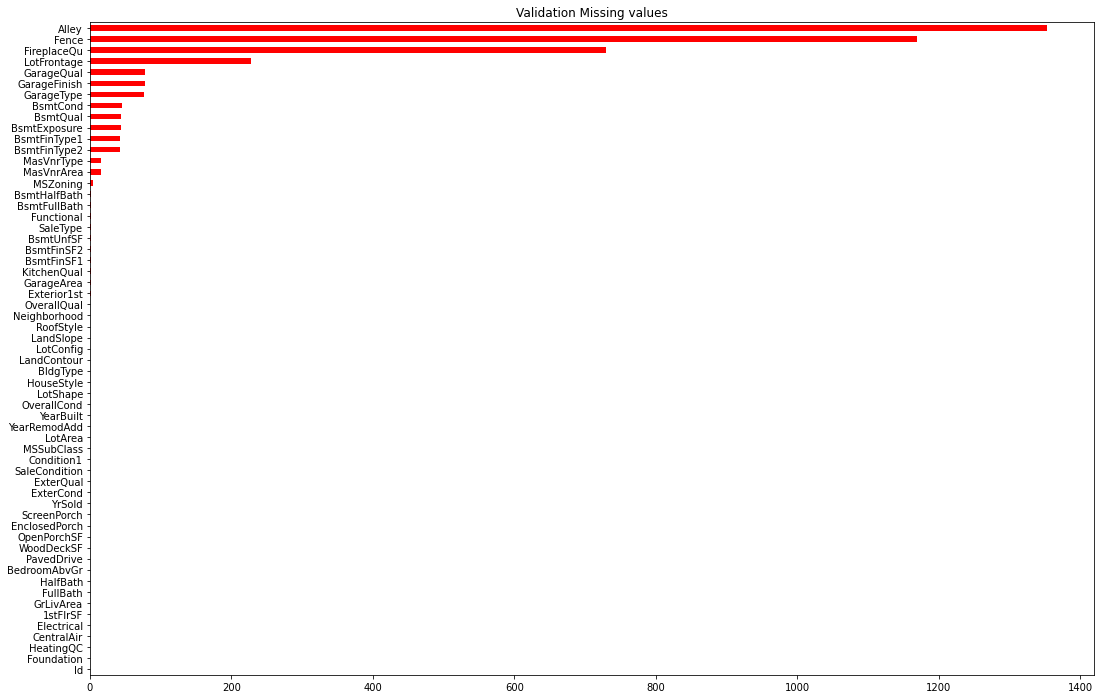

In [112]:
test_df = test_df.drop(columns=train_dropped_columns)

plt.figure(figsize=(18, 12))
test_df.isna().sum().sort_values().plot.barh(color='red')
plt.title('Validation Missing values')
plt.show()

### Ordinal encoding

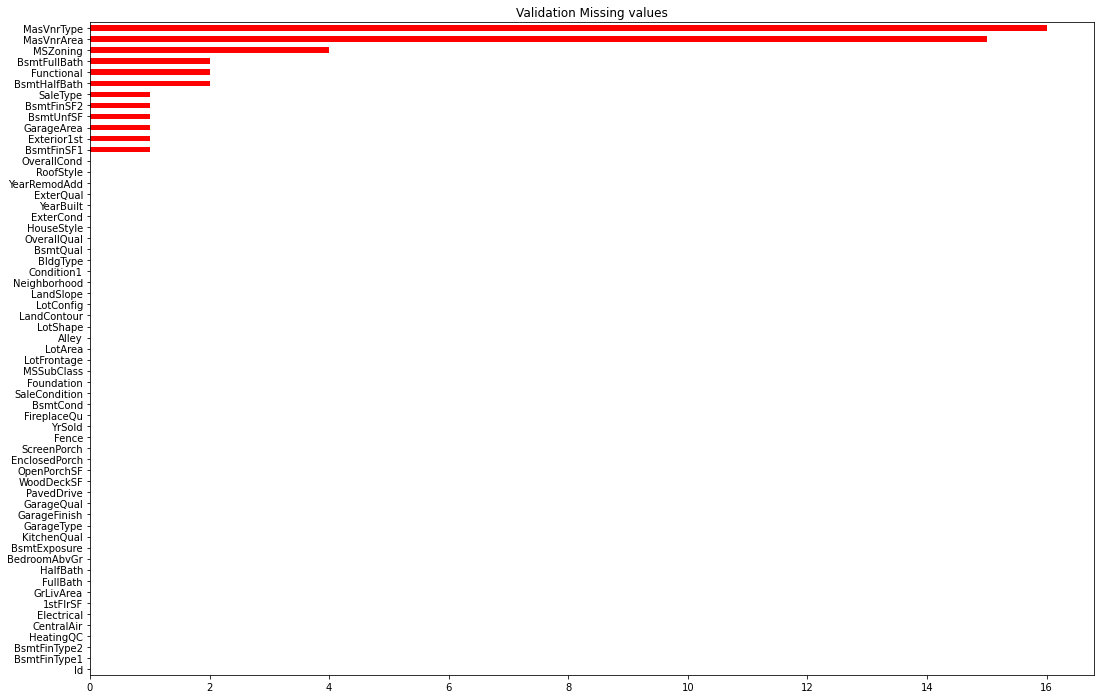

In [113]:
test_df['MSZoning'] = test_df.MSZoning.replace(zoning_mapper)
test_df['Alley'] = test_df.Alley.replace(street_mapper)
test_df['LandSlope'] = test_df.LandSlope.replace(slope_mapper)
test_df['ExterQual'] = test_df.ExterQual.replace(quality_mapper)
test_df['ExterCond'] = test_df.ExterCond.replace(quality_mapper)
test_df['BsmtQual'] = test_df.BsmtQual.replace(quality_mapper)
test_df['BsmtCond'] = test_df.BsmtCond.replace(quality_mapper)
test_df['FireplaceQu'] = test_df.FireplaceQu.replace(quality_mapper)
test_df['KitchenQual'] = test_df.KitchenQual.replace(quality_mapper)
test_df['HeatingQC'] = test_df.HeatingQC.replace(quality_mapper)
test_df['GarageQual'] = test_df.GarageQual.replace(quality_mapper)
test_df['BsmtExposure'] = test_df.BsmtExposure.replace(bsmtexp_mapper)
test_df['BsmtFinType1'] = test_df.BsmtFinType1.replace(bsmtfin_mapper)
test_df['BsmtFinType2'] = test_df.BsmtFinType2.replace(bsmtfin_mapper)
test_df['CentralAir'] = test_df.CentralAir.replace(central_air_mapper)
test_df['Electrical'] = test_df.Electrical.replace(electrical_mapper)
test_df['Functional'] = test_df.Functional.replace(functionality_mapper)
test_df['GarageFinish'] = test_df.GarageFinish.replace(garage_finish_mapper)
test_df['Fence'] = test_df.Fence.replace(fence_mapper)
test_df['PavedDrive'] = test_df.PavedDrive.replace(paved_drive_mapper)
test_df['GarageType'] = test_df.GarageType.fillna('None')
test_df['LotFrontage'] = test_df.LotFrontage.fillna(0)

plt.figure(figsize=(18, 12))
test_df.isna().sum().sort_values().plot.barh(color='red')
plt.title('Validation Missing values')
plt.show()

### Fill null values

In [114]:
fill_na_cols(test_df)
print('Null values:', test_df.isna().sum().sum())

Null values: 0


### Log transformations

In [115]:
test_df['LotArea'] = np.log1p(test_df.LotArea)
test_df['MasVnrArea'] = np.log1p(test_df.MasVnrArea)
test_df['OpenPorchSF'] = np.log1p(test_df.OpenPorchSF)
test_df['BsmtFinSF1'] = np.log1p(test_df.BsmtFinSF1)
test_df['WoodDeckSF'] = np.log1p(test_df.WoodDeckSF)
test_df['MSSubClass'] = np.log1p(test_df.MSSubClass)
test_df['1stFlrSF'] = np.log1p(test_df['1stFlrSF'])
test_df['GrLivArea'] = np.log1p(test_df.GrLivArea)
test_df['BsmtUnfSF'] = np.log1p(test_df.BsmtUnfSF)
test_df['OverallCond'] = np.log1p(test_df.OverallCond)

### OneHot encoding

In [116]:
test_columns_to_encode = ['LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',\
                          'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'Foundation',\
                          'GarageType', 'SaleType', 'SaleCondition']
test_lot_shape_dummies = pd.get_dummies(test_df.LotShape, prefix='LotShape')
test_land_contour_dummies = pd.get_dummies(test_df.LandContour, prefix='LandContour')
test_lot_config_dummies = pd.get_dummies(test_df.LotConfig, prefix='LotConfig')
test_land_slope_dummies = pd.get_dummies(test_df.LandSlope, prefix='LandSlope')
test_condition_dummies = pd.get_dummies(test_df.Condition1, prefix='Condition')
test_bldg_type_dummies = pd.get_dummies(test_df.BldgType, prefix='BldgType')
test_house_style_dummies = pd.get_dummies(test_df.HouseStyle, prefix='HouseStyle')
test_roof_style_dummies = pd.get_dummies(test_df.RoofStyle, prefix='RoofStyle')
test_masvnr_type_dummies = pd.get_dummies(test_df.MasVnrType, prefix='MasVnrType')
test_foundation_dummies = pd.get_dummies(test_df.Foundation, prefix='Foundation')
test_garage_type_dummies = pd.get_dummies(test_df.GarageType, prefix='GarageType')
test_sale_type_dummies = pd.get_dummies(test_df.SaleType, prefix='SaleType')
test_sale_condition_dummies = pd.get_dummies(test_df.SaleCondition, prefix='SaleCondition')

test_neighborhood_dummies = pd.get_dummies(test_df.Neighborhood, prefix='Neighborhood')
test_exterior1st_dummies = pd.get_dummies(test_df.Exterior1st, prefix='Exterior1st')

test_df = pd.concat([test_df, test_lot_shape_dummies, test_land_contour_dummies, test_lot_config_dummies, 
                     test_land_slope_dummies, test_condition_dummies, test_bldg_type_dummies, test_house_style_dummies, 
                     test_roof_style_dummies, test_masvnr_type_dummies, test_foundation_dummies,
                     test_garage_type_dummies, test_sale_type_dummies, test_sale_condition_dummies, 
                     test_neighborhood_dummies, test_exterior1st_dummies], axis=1)

test_df = test_df.drop(columns=test_columns_to_encode)
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,YrSold,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_1,LandSlope_2,LandSlope_3,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNe,Condition_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,1461,3.044522,4.0,80.0,9.360741,0,5,1.945910,1961,1961,0.000000,3,3,3,3,1,3,6.150603,2,144.0,5.602119,3,1,3,6.799056,6.799056,0.0,0.0,1,0,2,3,7.0,0,1,730.0,3,3,4.948760,0.000000,0,120,3,2010,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1462,3.044522,6.0,81.0,9.565775,0,6,1.945910,1958,1958,4.691348,3,3,3,3,1,5,6.828712,1,0.0,6.008813,3,1,3,7.192934,7.192934,0.0,0.0,1,1,3,4,7.0,0,1,312.0,3,3,5.976351,3.610918,0,0,0,2010,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1463,4.110874,6.0,74.0,9.534668,0,5,1.791759,1997,1998,0.000000,3,3,4,3,1,6,6.674561,1,0.0,4.927254,4,1,3,6.834109,7.396335,0.0,0.0,2,1,3,3,7.0,3,3,482.0,3,3,5.361292,3.555348,0,0,3,2010,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1464,4.110874,6.0,78.0,9.208238,0,6,1.945910,1998,1998,3.044522,3,3,3,3,1,6,6.401917,1,0.0,5.783825,5,1,3,6.831954,7.380879,0.0,0.0,2,1,3,4,7.0,4,3,470.0,3,3,5.888878,3.610918,0,0,0,2010,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0

### Check missing columns

In [117]:
train_missing_columns = []
for col in test_df.columns:
    if col not in train_df.columns:
        train_missing_columns.append(col)

test_missing_columns = []
for col in train_df.columns:
    if col not in test_df.columns:
        test_missing_columns.append(col)
train_missing_columns, test_missing_columns

(['Id', 'Condition_RRNe'],
 ['SalePrice',
  'HouseStyle_2.5Fin',
  'Exterior1st_ImStucc',
  'Exterior1st_Stone',
  'OverallQualCond',
  'OverallQualSq',
  'ExterQualCond',
  'FullBathSum',
  'HalfBathSum',
  'BsmtQualCond',
  'OverallQualCb'])

### Add missing columns to test df

In [118]:
test_df = test_df.drop(columns=['Condition_RRNe'])
test_full_df = pd.DataFrame(columns=train_df_final_columns)
test_full_df = test_full_df.drop(columns=['SalePrice'])
test_full_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing'],
      dtype='object', length=159)

### Add non-linear parameters, normalize

In [119]:
test_full_df[test_df.columns] = test_df
test_full_df.head()

test_full_df['OverallQualCond'] = test_full_df.OverallQual * test_full_df.OverallCond
test_full_df['OverallQualSq'] = test_full_df.OverallQual**2
test_full_df['OverallQualCb'] = test_full_df.OverallQual**3

test_X = test_full_df.drop(columns=['Id'])
test_X = (test_X - test_X.mean()) / test_X.std()
test_X = test_X.fillna(0)
test_X.insert(0, 'Ones', 1)
test_X = np.matrix(test_X.values)
test_X.shape, thetas_1.shape

((1459, 162), (1, 162))

### Create predicted price dataframe by multiplying test features' values by weights (thetas)

In [120]:
predicted_price = np.exp(test_X * thetas_1.T)
predicted_price_df = pd.DataFrame(predicted_price, columns=['SalePrice'])
predicted_price_df.insert(0, 'Id', test_full_df.Id)
predicted_price_df = predicted_price_df.set_index('Id')
predicted_price_df.head()

,SalePrice
Id,
1461,127328.063066
1462,158477.472448
1463,179075.762937
1464,192583.822899
1465,211052.494545


### Export result to submit on kaggle
#### https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submit

In [121]:
predicted_price_df.to_csv('results.csv')